# McIntyre Problem 10.20
For an infinite square well subject to the perturbation,
$$
H' = \gamma x(L-x)
$$
calculate the first order energy corrections.

In [1]:
# load the sympy library
from sympy import *

In [2]:
# declare some symbols
# being as specific as possible at this step with help things simplify below
x, γ = symbols("x γ", real=True)
n, m = symbols("n m", integer=True, positive=True) # state labels
ħ, M, L = symbols("ħ M L", real=True, positive=True) # constants (big M is mass)
π = pi # use a pretty pi

In [3]:
# define the unperturbed eigenenergies as functions of n
# "lambda" is a shortcut to define simple functions
# the syntax is lambda (variables): some one-line expression
E0 = lambda n: n**2*π**2*ħ**2/(2*M*L**2)

In [4]:
# check the definition
E0(n)

pi**2*n**2*ħ**2/(2*L**2*M)

In [5]:
# define the unperturbed eigenstates as functions of n and x
# note that we're not checking the domain, so the user must ensure 0 < x < L
ϕ0 = lambda n,x: sqrt(2/L)*sin(n*π*x/L)

In [6]:
# check the definition
ϕ0(n,x)

sqrt(2)*sin(pi*n*x/L)/sqrt(L)

In [7]:
# define the perturbation as a function of x
Hp = lambda x: γ*x*(L-x)

In [8]:
# check
Hp(x)

x*γ*(L - x)

## First-order energy corrections
I'll define a function to setup a matrix element integral
$$
\langle n \vert H' \vert m \rangle = \int\limits_0^L \phi^{(0)}_n(x)^*\,H'\,\phi^{(0)}_m(x)\,dx
$$

In [9]:
# define a matrix element integral of the operator Hp w.r.t. the unperturbed eigenstates |n> and |m>
# Note, I could have also used the lambda notation like above
def HpMatrixElement(n,m):
    # because the eigenfunctions are real functions, I'll skip the complex conjugate
    # the form of the Integral command is integrate(function, (integration variable, lower limit, upper limit))
    # note that the limits may include infinity, written as oo (two letters small o)
    return Integral(ϕ0(n,x)*Hp(x)*ϕ0(m,x),(x,0,L))

In [10]:
# check our definition
HpMatrixElement(n,m)

Integral(2*x*γ*(L - x)*sin(pi*m*x/L)*sin(pi*n*x/L)/L, (x, 0, L))

In [11]:
# Calculate the 1st order energy correction
# we perform the integral using the "doit()" method
E1 = lambda n: HpMatrixElement(n,n).doit()

In [12]:
# display the result
E1(n)

2*γ*(L**3/12 + L**3/(4*pi**2*n**2))/L

## First-order state corrections
The first order state corrections require an infinite sum.
$$
\vert n^{(1)} \rangle = \sum\limits_{m\neq n} \frac{\langle m^{(0)}\vert H'\vert n^{(0)}\rangle}{E^{(0)}_n-E^{(0)}_m}\,\vert m^{(0)} \rangle
$$

In [13]:
# Let's try the matrix element first
HpMatrixElement(n,m).doit()

Piecewise((-2*γ*(2*pi*L**3*m**3*n/(pi**3*m**6 - 3*pi**3*m**4*n**2 + 3*pi**3*m**2*n**4 - pi**3*n**6) - 2*pi*L**3*m*n**3/(pi**3*m**6 - 3*pi**3*m**4*n**2 + 3*pi**3*m**2*n**4 - pi**3*n**6))/L + 2*γ*(-2*(-1)**m*(-1)**n*pi*L**3*m**3*n/(pi**3*m**6 - 3*pi**3*m**4*n**2 + 3*pi**3*m**2*n**4 - pi**3*n**6) + 2*(-1)**m*(-1)**n*pi*L**3*m*n**3/(pi**3*m**6 - 3*pi**3*m**4*n**2 + 3*pi**3*m**2*n**4 - pi**3*n**6))/L, Ne(m, n)), (L**2*γ/6 + L**2*γ/(2*pi**2*n**2), True))

We get two answers, one for $m=n$ (which we don't need here) and one for $m\neq n$. We can extract the useful one using a hack.  Piecewise functions are actually stored in memory as a nested list called `args`.  The piece we want is the first element of the first sublist, which we specify as `[0][0]`.  The code looks like

In [14]:
HpMatrixElement(n,m).doit().args[0][0]

-2*γ*(2*pi*L**3*m**3*n/(pi**3*m**6 - 3*pi**3*m**4*n**2 + 3*pi**3*m**2*n**4 - pi**3*n**6) - 2*pi*L**3*m*n**3/(pi**3*m**6 - 3*pi**3*m**4*n**2 + 3*pi**3*m**2*n**4 - pi**3*n**6))/L + 2*γ*(-2*(-1)**m*(-1)**n*pi*L**3*m**3*n/(pi**3*m**6 - 3*pi**3*m**4*n**2 + 3*pi**3*m**2*n**4 - pi**3*n**6) + 2*(-1)**m*(-1)**n*pi*L**3*m*n**3/(pi**3*m**6 - 3*pi**3*m**4*n**2 + 3*pi**3*m**2*n**4 - pi**3*n**6))/L

In [15]:
# Let's try to simplify
_.simplify()

-4*L**2*m*n*γ*(1 - (-1)**(m + n + 1))/(pi**2*(m**4 - 2*m**2*n**2 + n**4))

Note that this is equal to zero if m+n is odd. we can use that fact to simplify the sum later

In [16]:
# print this as code so that we can copy and paste it into a new function
str(_)

'-4*L**2*m*n*γ*(1 - (-1)**(m + n + 1))/(pi**2*(m**4 - 2*m**2*n**2 + n**4))'

In [17]:
# copy and paste from above
HpOffDiagonal = lambda n, m: -4*L**2*m*n*γ*(1 - (-1)**(m + n + 1))/(pi**2*(m**4 - 2*m**2*n**2 + n**4))

I'm going to attempt to evaluate the sums inside $\vert n^{(1)}\rangle$.  I know these don't simplify, but I just want to show that if you *really* need to do this in python you can.  This is very much a brute-force solution made by trial and error.  There is probably a more eligant way to code it.  You may skip down to **Results** below if you just want to see the first few terms of the sums.

To actually do the sum we have to break it into pieces $m<n$ and $m>m$.  This gives us special cases when $n=1$ (no < sum) and $n=2$ (only one term in the < sum).  I also break the function into n=odd and n=even cases.

In [18]:
k = symbols("k", integer=True) # new summation variable

In [19]:
def ϕ1(n,x,mmax=oo):
    # mmax is an optional parameter to terminate the sum at a maximum value of m
    # calculate the kmax values for below
    if mmax==oo:
        kmax = oo
    elif ask(Q.odd(mmax)):
        kmax = (mmax-1)/Integer(2)
    else:
        kmax = mmax/Integer(2) # FIXME for odd n this gives one extra term
        
    if n==1:
        # we only need to sum the odd terms, so I'll sub m=2k+1.  The sum will start at k = 1
        return Sum(HpOffDiagonal(n,2*k+1)/(E0(n)-E0(2*k+1))*ϕ0(2*k+1,x),(k,1,kmax))
    elif n==2:
        # here we only need to sum the even terms, so I'll sub m=2k.  The sum will start from k=2
        return Sum(HpOffDiagonal(n,2*k)/(E0(n)-E0(2*k))*ϕ0(2*k,x),(k,2,kmax))
    elif ask(Q.odd(n)): # odd values of n>1
        return Sum(HpOffDiagonal(n,2*k+1)/(E0(n)-E0(2*k+1))*ϕ0(2*k+1,x),(k,0,(n-3)/Integer(2)))+Sum(HpOffDiagonal(n,2*k+1)/(E0(n)-E0(2*k+1))*ϕ0(2*k+1,x),(k,(n+1)/Integer(2),kmax))
    else: # even values of n>2
        return Sum(HpOffDiagonal(n,2*k)/(E0(n)-E0(2*k))*ϕ0(2*k,x),(k,1,(n-2)/Integer(2)))+Sum(HpOffDiagonal(n,2*k)/(E0(n)-E0(2*k))*ϕ0(2*k,x),(k,(n+2)/Integer(2),kmax))

In [20]:
ϕ1(1,x).simplify()

sqrt(2)*L**(7/2)*M*γ*Sum((2 + 1/k)*sin(pi*x*(2*k + 1)/L)/(k**2*(k**3 + 3*k**2 + 3*k + 1)), (k, 1, oo))/(4*pi**4*ħ**2)

In [21]:
# The result doesn't simplify (as expected), but we see the key terms
ϕ1(2,x).simplify()

-sqrt(2)*L**(7/2)*M*γ*Sum(k*sin(2*pi*k*x/L)/(-k**6 + 3*k**4 - 3*k**2 + 1), (k, 2, oo))/(pi**4*ħ**2)

In [22]:
ϕ1(3,x).simplify()

3*sqrt(2)*L**(7/2)*M*γ*(-sin(pi*x/L)/8 + Sum((2*k + 1)*sin(pi*x*(2*k + 1)/L)/(k**6 + 3*k**5 - 3*k**4 - 11*k**3 + 6*k**2 + 12*k - 8), (k, 2, oo)))/(4*pi**4*ħ**2)

In [23]:
ϕ1(4,x).simplify()

2*sqrt(2)*L**(7/2)*M*γ*(-sin(2*pi*x/L)/27 + Sum(k*sin(2*pi*k*x/L)/(k**6 - 12*k**4 + 48*k**2 - 64), (k, 3, oo)))/(pi**4*ħ**2)

By specifying `mmax` we can start to get approximate functions we can evaluate.

*Question:* We could in theory estimate the size of the 2nd order corrections. Then we only need a few terms in the sum where *m* is near *n* to have a numerical result consistent with the order of the approximation.  How many terms do we need?

### Results

In [24]:
ϕ1(1,x,10-1).doit()

-8*sqrt(2)*L**(3/2)*γ*(-3*L**2*M*sin(3*pi*x/L)/(256*pi**2*ħ**2) - 5*L**2*M*sin(5*pi*x/L)/(6912*pi**2*ħ**2) - 7*L**2*M*sin(7*pi*x/L)/(55296*pi**2*ħ**2) - 9*L**2*M*sin(9*pi*x/L)/(256000*pi**2*ħ**2))/pi**2

In [25]:
# now add back in the unperturbed state to get the final result
(ϕ0(1,x)+ϕ1(1,x,10-1).doit()).simplify()

sqrt(2)*(L**4*M*γ*(81000*sin(3*pi*x/L) + 5000*sin(5*pi*x/L) + 875*sin(7*pi*x/L) + 243*sin(9*pi*x/L))/864000 + pi**4*ħ**2*sin(pi*x/L))/(pi**4*sqrt(L)*ħ**2)

In [26]:
# sub in some numbers and get a function
values = [(ħ,1),(M,1),(L,1),(γ,20)] # values for our constants
N((ϕ0(1,x)+ϕ1(1,x,10-1).doit()).subs(values)) # The N command returns a decimal approximation

1.4142135623731*sin(pi*x) + 0.0272217962543552*sin(3*pi*x) + 0.00168035779347872*sin(5*pi*x) + 0.000294062613858775*sin(7*pi*x) + 8.16653887630656e-5*sin(9*pi*x)

Notice how small the added terms are, even with a large value of $\gamma$.

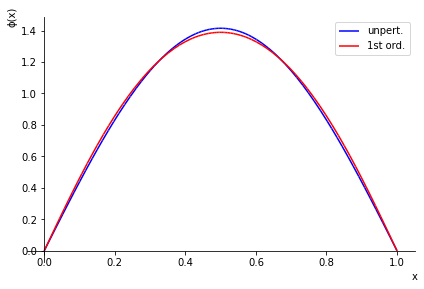

In [27]:
# sub in some numbers and plot it
p=plot(ϕ0(1,x).doit().subs(values),(x,0,1),line_color="blue",show=False,label="unpert.")
p.extend(plot((ϕ0(1,x)+ϕ1(1,x,10).doit()).subs(values),(x,0,1),line_color="red",show=False,label="1st ord."))
p.legend = True
p.ylabel = "ϕ(x)"
p.show()

In [28]:
# compare the energies for these values of the constants
N(E0(1).subs(values))

4.93480220054468

In [29]:
N((E0(1)+E1(1)).subs(values))

9.28134737030139

Notice that the energies change by a lot even though the wavefunction does not.